# GAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [2]:
RUN_ID = '0017'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_safari('elephant')

## architecture

In [4]:
x_train.shape

(80000, 28, 28, 1)

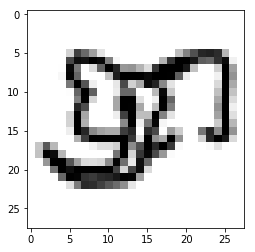

In [5]:
plt.imshow(x_train[0,:,:,0], cmap = 'gray_r')

In [6]:
np.min(x_train[0])

-1.0

In [12]:
# works

gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008 
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,1]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004 
        , optimiser = 'rmsprop'
        , z_dim = 100
        )




gan.save(RUN_FOLDER)

In [13]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [14]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
discriminator_conv_2 (Conv2D (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [15]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_13 (Batc (None, 3136)              12544     
_________________________________________________________________
activation_24 (Activation)   (None, 3136)              0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 14, 14, 128)       204928    
_________________________________________________________________
batch_normalization_14 (Batc (None, 14, 14, 128)       512       
__________

## training

In [16]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
)



0 [D loss: 0.692726] [D acc: 0.574219] [G loss: 0.099604] [G acc: 1.000000]
1 [D loss: 2.157887] [D acc: 0.500000] [G loss: 1.133151] [G acc: 0.000000]
2 [D loss: 0.786640] [D acc: 0.500000] [G loss: 0.890125] [G acc: 0.000000]
3 [D loss: 0.628010] [D acc: 0.679688] [G loss: 1.560783] [G acc: 0.000000]
4 [D loss: 0.428830] [D acc: 0.898438] [G loss: 2.842371] [G acc: 0.000000]
5 [D loss: 0.133066] [D acc: 1.000000] [G loss: 11.274679] [G acc: 0.000000]
6 [D loss: 0.493525] [D acc: 0.765625] [G loss: 0.050605] [G acc: 1.000000]
7 [D loss: 2.554204] [D acc: 0.500000] [G loss: 1.963197] [G acc: 0.000000]
8 [D loss: 0.397054] [D acc: 0.996094] [G loss: 1.520084] [G acc: 0.000000]
9 [D loss: 0.248331] [D acc: 1.000000] [G loss: 2.656789] [G acc: 0.000000]
10 [D loss: 0.142357] [D acc: 0.992188] [G loss: 3.796268] [G acc: 0.000000]
11 [D loss: 0.344039] [D acc: 0.972656] [G loss: 15.298037] [G acc: 0.000000]
12 [D loss: 0.724090] [D acc: 0.679688] [G loss: 2.359208] [G acc: 0.000000]
13 [D l

KeyboardInterrupt: 

In [ ]:
gan.model.optimizer

In [ ]:
plt.plot(g_accs, color='orange', linewidth=1)
plt.plot(d_accs, color='green', linewidth=1)



In [ ]:
for i in range(10):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

In [ ]:
noise = np.random.uniform(-1, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [ ]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))